# Predicting depression - DASS-42

#### Objective: Implement four supervised machine learning models, with the goal of predicting depression using a labelled dataset. DASS-42: Depression anxiety stress scale. A 42 item questionnaire asking participants about their mental health. This data was collected through 2017-2019.

###### *Contact me if you would like a copy of the datatset for your own project.*

Steps:
1. EDA - Understand data, clean data and analyse relationships
2. Data preprocessing - Create target variables
3. Implement - Create and use the models
3. Results - Predictions
4. Evaluation/refining - Improve accuracy

#### Note: To classify, Q1A to Q42A will be used to build the target. Other features will be dropped or used as part of the training/testing.

In [207]:
# All libraries required
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.svm import SVC

#metrics/other
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from google.colab import drive
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [208]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CN6000_diss/data3.csv",sep= '\t')
pd.set_option("display.max_columns", None)

In [209]:
df.sample(4) #random selection

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
22796,3,15,4349,3,5,5868,2,30,2518,2,14,4434,4,12,3484,1,34,2017,3,18,5699,2,41,3733,2,23,11504,2,22,2497,2,29,2865,2,27,4334,3,36,1888,1,32,11267,2,26,2697,2,21,4515,4,35,2745,3,39,1579,2,8,4151,1,33,5282,3,31,2684,2,28,2048,4,20,5417,2,11,5733,3,17,4831,3,37,1350,4,6,13442,3,38,986,2,16,4350,2,4,5766,2,10,2917,2,1,10413,2,19,1933,4,7,1506,2,3,4916,4,24,17467,4,40,4784,4,9,1781,2,2,10072,3,42,15535,2,25,4734,4,13,4866,MY,0,12,217,220,6,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,3,3,2,0,20,1,1,1,10,0,10,2,1,4,NaN
37193,4,15,1803,4,16,1845,4,23,3024,2,12,2855,4,38,1619,4,27,1819,2,6,2591,4,22,1577,4,21,3535,4,13,2067,4,34,1458,4,9,2596,4,30,1721,4,24,3699,3,8,3571,4,28,1847,4,25,2773,4,18,1726,3,39,2900,3,31,1981,4,32,1178,2,17,3008,2,2,4370,3,5,3468,3,11,4434,3,10,2747,4,4,2415,2,26,1846,3,40,3473,3,19,5669,3,7,1950,3,35,13921,4,1,1813,4,42,1289,3,20,4058,2,14,2120,3,3,2928,4,37,1869,4,41,1544,4,33,2313,3,29,3071,3,36,3468,MY,1,2,129,113,2,5,2,7,4,6,6,7,4,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,2,20,1,2,1,10,1,10,2,1,4,Chemistry
13966,1,20,4945,1,10,4140,2,29,6846,1,5,3966,2,39,5501,1,35,2707,1,19,3737,2,16,16302,2,17,6672,3,18,2986,1,7,4206,1,30,6803,3,11,1800,1,27,5213,1,40,2328,3,6,8772,3,38,1595,1,41,2604,1,12,8700,1,8,5230,3,13,2778,2,21,5586,1,31,2135,3,4,3624,1,33,9282,3,26,3024,1,36,1609,1,23,2446,1,24,4278,2,42,10350,2,2,11843,2,22,4092,2,25,3636,3,37,2370,2,15,6713,1,34,7727,2,32,6414,3,9,3270,3,3,4961,3,28,4643,2,1,14079,3,14,5562,DE,2,2,227,189,2,5,3,3,5,6,3,5,5,2,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,2,1,2,17,2,1,2,1,1,60,2,1,2,NaN
4706,2,32,2333,1,35,3163,1,7,4473,1,33,3627,2,24,2965,3,30,2265,1,10,2525,2,26,2685,2,23,3728,2,5,6182,2,25,3569,1,42,2140,2,31,2237,4,13,10751,1,20,3268,2,22,3165,2,29,2760,2,39,4496,1,12,2656,2,27,3687,2,16,3346,2,17,3801,1,41,2440,2,36,3038,1,21,5696,2,19,2919,3,18,3715,1,40,3192,1,8,4447,2,37,3746,3,4,8625,2,3,17991,1,38,2285,2,2,14557,2,28,3562,2,1,19033,1,9,7371,2,14,5296,1,34,2948,2,11,6616,1,6,2562,3,15,5432,MY,1,16,210,186,5,6,5,6,6,6,5,7,5,5,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,2,2,1,2,23,2,1,1,10,1,70,2,1,5,construction


In [210]:
df.tail(2) #show the last two records

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
39773,3,36,4286,1,34,2736,2,10,5968,2,20,5655,3,9,2296,3,16,2627,3,32,3143,4,2,3164,3,19,5568,1,41,2324,3,39,2766,3,26,2852,4,42,2121,4,27,3097,1,6,3663,1,24,11004,2,38,2672,3,8,2285,1,29,4014,2,22,2671,2,35,10759,4,4,2830,1,37,1999,2,5,4785,1,23,3803,3,25,2487,4,14,2496,3,18,8333,3,33,3763,1,17,7682,2,28,2946,3,12,3163,4,7,2287,2,11,9307,3,3,3688,2,31,1878,1,40,2797,2,1,7095,3,21,2844,2,30,6185,4,15,1865,3,13,4647,US,2,2,174,113,1,6,5,7,3,5,3,5,3,4,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,1,20,2,1,1,6,1,60,1,1,2,History
39774,2,28,32251,1,22,3317,2,4,11734,1,19,4659,4,32,4236,2,1,33800,1,3,7855,1,34,3151,1,31,12698,1,41,3656,3,13,2843,1,40,3681,3,7,4381,1,20,16269,1,36,2741,4,18,3819,4,14,2730,3,30,9398,4,8,19839,3,12,2921,4,2,6807,2,42,34632,1,37,2275,2,27,5026,2,16,22293,2,38,5087,3,23,23294,2,11,4667,3,9,5012,1,29,14627,2,33,6248,2,5,9402,2,26,4009,3,24,4033,2,6,26642,2,17,4894,2,39,9317,4,25,2478,3,10,19868,3,35,12200,1,21,3492,4,15,13954,MY,1,17,427,371,6,2,3,5,6,3,5,5,1,2,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,3,2,2,26,1,1,1,10,1,10,1,1,4,Cognitive Science


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [212]:
print(df.duplicated().sum())

0


In [213]:
df_size = df.shape #store shape in size

row = df_size[0]    #0 = row, 1 = columns
col = df_size[1]

print("the number of rows:", row)
print("the number of columns:", col)

the number of rows: 39775
the number of columns: 172


In [214]:
df.describe() #describe all numerical columns

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.00000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,3.977500e+04,3.977500e+04,3.977500e+04,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,21.499837,7.128728e+03,2.521458,21.492118,5.919306e+03,2.540214,21.562866,5.724097e+03,1.924928,21.528422,9.776971e+03,2.480427,21.569227,4.444627e+03,2.669591,21.582778,1.833083e+04,2.447316,21.417574,9.157494e+03,2.803294,21.434041,5.490152e+03,2.425669,21.485808,6.570469e+03,2.784538,21.501446,3.931872e+03,2.580264,21.571791,1.034875e+04,1.826901,21.501672,5.243594e+03,2.519573,21.459485,6.446743e+03,2.658605,21.497021,5.197918e+03,2.477536,21.530685,7.293520e+03,1.946298,21.549994,1.124446e+04,2.323042,21.519899,4.965477e+03,2.349591,21.566989,5.596290e+03,2.344488,21.516229,6.865094e+03,1.562288,21.479246,4.603325e+03,2.437109,21.531263,8.142970e+03,2.184312,21.563193,1.408290e+04,2.658580,21.445179,5.336940e+03,2.612344,21.527366,8.448039e+03

In [215]:
df.Q1A.describe()

count    39775.000000
mean         2.619485
std          1.032117
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: Q1A, dtype: float64

In [216]:
df.age.describe()

count    39775.000000
mean        23.612168
std         21.581722
min         13.000000
25%         18.000000
50%         21.000000
75%         25.000000
max       1998.000000
Name: age, dtype: float64

In [217]:
df['age'].unique()

array([  16,   17,   13,   19,   20,   29,   18,   15,   31,   34,   22,
         42,   21,   23,   26,   43,   35,   25,   24,   61,   40,   27,
         28,   60,   14,   37,   46,   57,   41,   55,   36,   30,   32,
         56,   71,   67,   44,   38,   49,   45,   47,   33,   54,   53,
         50,   48,   58,   68,   39,   51,   62,   59,   52,   77,   85,
         63,   69,   65,   75,   72,   70,   73,   64,   66,   79,   80,
         78,  223, 1996,   89,  117,   82,   74, 1998,   76,  115, 1993,
       1991,   99])

Some people decided to enter their year of birth instead of age. These are considered outliers.

In [218]:
df = df.drop(df[df.age > 90].index) #Get rid of all participants older than 90
df.age.unique()

array([16, 17, 13, 19, 20, 29, 18, 15, 31, 34, 22, 42, 21, 23, 26, 43, 35,
       25, 24, 61, 40, 27, 28, 60, 14, 37, 46, 57, 41, 55, 36, 30, 32, 56,
       71, 67, 44, 38, 49, 45, 47, 33, 54, 53, 50, 48, 58, 68, 39, 51, 62,
       59, 52, 77, 85, 63, 69, 65, 75, 72, 70, 73, 64, 66, 79, 80, 78, 89,
       82, 74, 76])

In [219]:
df['major'].unique()

array([nan, 'biology', 'Psychology', ...,
       '&#22810;&#23186;&#39636;&#35373;&#35336;',
       'public relation or administrations', 'computer sciece'],
      dtype=object)

In [220]:
df['major'].value_counts()

English               1026
Psychology             850
Business               621
Accounting             607
Engineering            582
                      ... 
Comp Science             1
Art and Education        1
Veterinary science       1
criminal law             1
computer sciece          1
Name: major, Length: 5309, dtype: int64

In [221]:
df.isnull().sum() # the column for "major" has 11403 null values

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11402
Length: 172, dtype: int64

<Axes: >

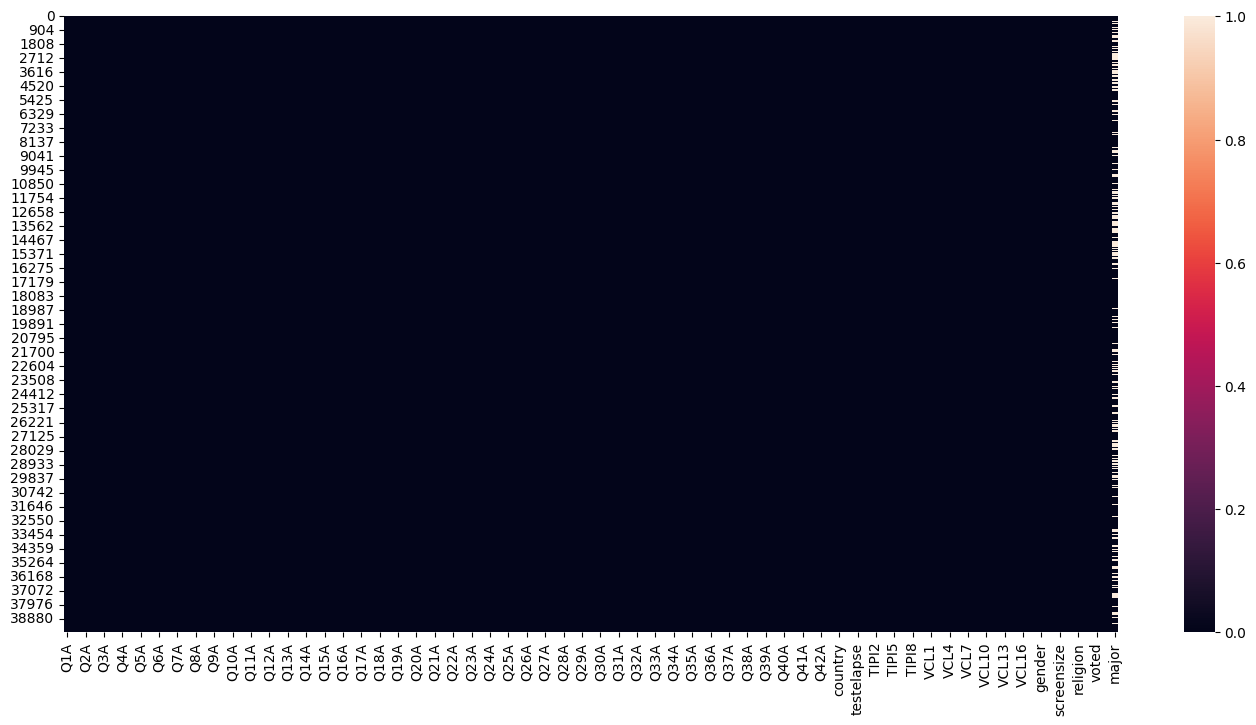

In [222]:
plt.figure(figsize=(17, 8))
sns.heatmap(df.isnull())

#### When dealing with null values, we can either delete or replace those values. In this case, I will replace every null value with the value "no degree".

In [223]:
df2 = df.fillna(value='No degree') #create new dataframe
df2

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,No degree
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,No degree
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,No degree
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [224]:
df2.major.describe()

count         39767
unique         5310
top       No degree
freq          11402
Name: major, dtype: object

In [225]:
df2['major'].value_counts()

No degree             11402
English                1026
Psychology              850
Business                621
Accounting              607
                      ...  
Comp Science              1
Art and Education         1
Veterinary science        1
criminal law              1
computer sciece           1
Name: major, Length: 5310, dtype: int64

In [226]:
df2_eng = df2[df2["major"] == "English"] #show all english majors
df2_eng

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
90,2,33,2575,2,13,2659,2,10,5460,3,6,3231,2,20,2186,2,2,6175,2,42,1795,3,7,1827,3,35,2617,2,8,3292,3,27,2037,2,16,3508,3,30,1774,3,31,3865,3,38,1581,2,34,39031,2,29,2371,3,37,2034,3,28,3100,3,4,2386,2,17,1542,2,3,2109,2,5,2297,2,24,2082,3,1,18286,2,19,1828,2,32,2867,3,21,2232,3,40,2219,3,39,11480,2,23,2614,2,18,3383,3,14,2981,2,25,2061,2,22,5929,2,41,1854,3,26,3998,2,11,1991,2,15,2135,4,12,3124,2,9,2549,4,36,2460,US,2,2,176,107,1,5,2,7,3,7,3,5,1,3,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,2,1,2,1,20,2,1,2,7,1,60,2,1,2,English
96,2,13,2342,1,35,3204,2,34,108458,2,3,6552,3,18,3217,2,22,2267,2,25,6369,4,21,2051,4,28,3002,1,17,3535,2,12,3237,2,38,3671,3,26,2194,2,24,3268,2,20,2057,3,9,2283,2,15,1725,1,32,3175,2,30,70949,2,11,2584,2,14,3101,3,36,2301,1,42,2088,3,1,9463,3,23,6049,4,8,1785,2,40,2301,3,19,2518,2,29,2401,2,37,4019,3,16,2252,3,6,4725,4,7,2883,2,10,2268,2,2,9128,1,31,7957,3,27,3500,2,5,69866,2,33,2317,3,39,3635,4,41,2301,4,4,4575,KH,2,60,388,193,1,5,6,6,5,7,5,1,3,3,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,3,2,2,1,23,2,1,1,6,3,60,1,1,3,English
97,2,30,4177,1,11,1981,3,25,5029,1,41,2664,3,39,2443,2,37,15724,1,7,2601,3,19,3677,3,13,7659,1,14,6215,2,9,3236,1,40,5600,4,16,3306,1,32,5535,1,10,2730,3,38,4672,3,27,3769,2,21,3300,1,23,3035,1,42,4687,3,5,4291,1,2,5317,1,1,3534,3,26,3074,1,31,7339,4,35,3147,2,6,2770,1,28,3961,4,22,5829,1,3,5430,3,36,2938,2,24,3931,3,20,2660,4,12,4225,1,8,4239,2,15,3822,3,29,104034,3,4,4010,2,18,3908,1,17,455544,1,34,2279,4,33,6311,US,2,42,1164,191,1,1,1,6,6,7,5,4,1,4,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,4,2,1,1,46,1,1,1,6,1,60,1,3,3,English
119,2,1,5645,3,9,1965,3,13,4531,2,23,5552,3,2,4999,2,38,2390,3,17,2163,2,35,2250,3,40,2767,4,27,1817,3,24,1924,2,4,2400,4,11,2147,3,26,2836,2,15,2391,3,12,1836,3,34,3347,3,39,2793,2,19,3392,2,8,3269,4,7,2155,2,14,2029,2,30,1767,3,32,2017,3,18,4551,3,21,1717,3,42,2639,2,20,2733,2,28,1776,3,41,3951,3,31,1783,3,5,3394,2,36,2025,3,16,1935,3,37,2409,2,25,1912,3,10,3602,3,6,2615,2,33,2327,2,3,2506,2,29,2542,4,22,2280,US,2,8,115,171,2,6,1,6,2,5,3,7,1,2,1,1,1,1,1,0,0,0,0,1,0,0,1,1,1,1,2,1,1,1,28,2,1,1,7,1,60,2,3,1,English
148,2,20,4515,1,18,8833,1,23,4133,2,15,9388,2,27,10544,3,11,7131,2,8,20738,2,10,3152,3,41,7079,2,5,1052,3,16,8399,4,14,11510,2,29,5264,1,22,8637,2,7,6700,2,42,5450,2,12,4367,2,4,3836,2,28,15293,2,17,4112,1,40,4231,1,38,7824,1,3,2653,2,30,1051,1,31,10656,2,21,7417,2,32,6995,2,39,4112,2,6,2875,1,13,6080,2,37,7700,3,9,10332,3,24,4729,2,36,1475,2,25,13935,2,2,11949,1,33,5406,1,1,10906,2,34,6509,2,26,6006,2,35,8183,2,19,7238,KR,2,432,413,156,5,2,2,2,6,6,5,5,6,5,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,3,2,3,2,26,2,1,3,12,5,10,1,1,1,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [227]:
df2=df2.replace('english','English')

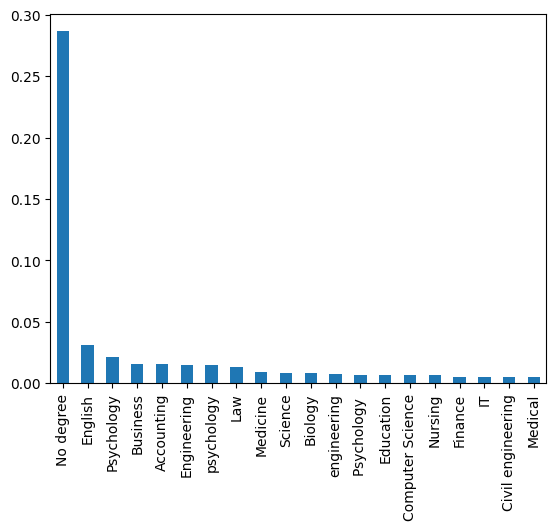

In [228]:
df2.major.value_counts(normalize=True)[:20].plot.bar() #top 20 majors
plt.show()
#measured as a percentage

In [229]:
df2.isnull().sum() # df2 has no null values

Q1A           0
Q1I           0
Q1E           0
Q2A           0
Q2I           0
             ..
race          0
voted         0
married       0
familysize    0
major         0
Length: 172, dtype: int64

<Axes: >

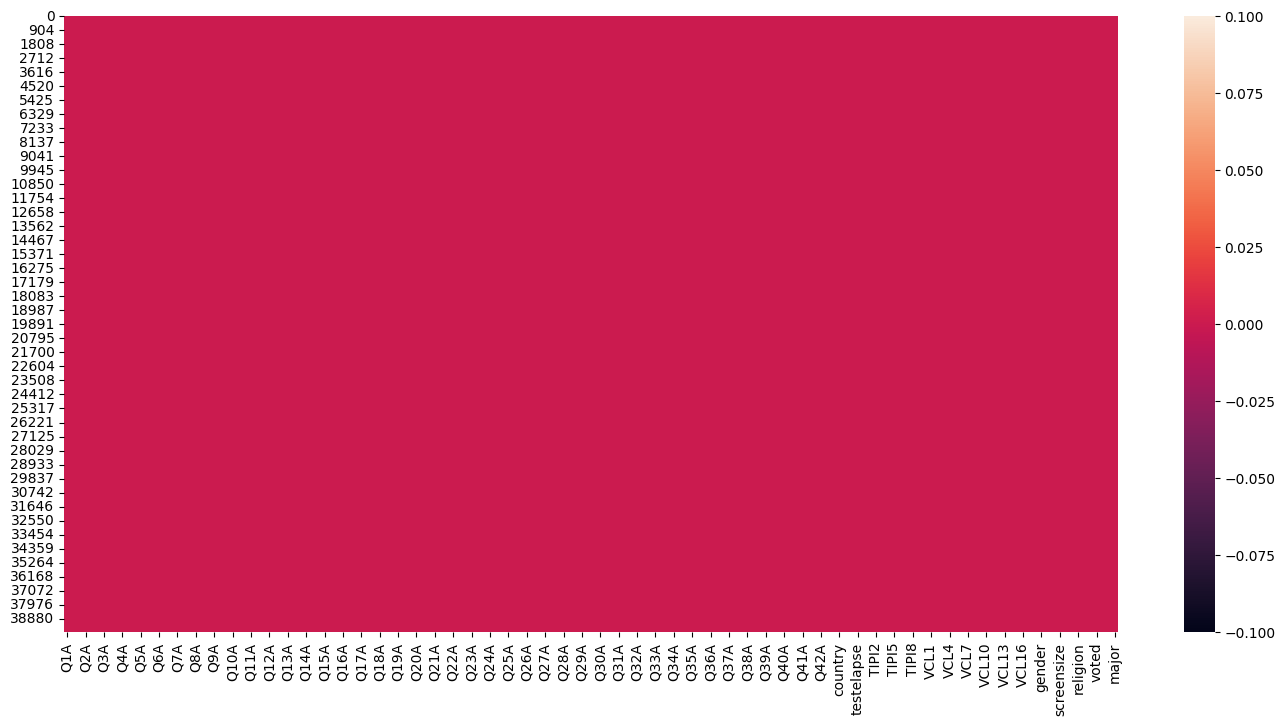

In [230]:
plt.figure(figsize=(17, 8))
sns.heatmap(df2.isnull())

### Since I am classifying for depression. I need to drop features that have little to no cause of depression.

In [231]:
# building a list to delete features
remove = [f'Q{i}E' for i in range(1, 43)] #  'Q1E' to 'Q42E' to be removed
remove.extend([f'Q{i}I' for i in range(1, 43)]) # 'Q1E' to 'Q42E' to be removed
remove.extend([f'VCL{i}' for i in range(1, 17)]) # 'VCL1' to 'VCL16' to be removed
remove.extend([ 'source', 'voted','introelapse', 'hand','orientation', 'uniquenetworklocation','surveyelapse', 'engnat',
     'country', 'testelapse','screensize',])

In [232]:
df3 = df2.drop(remove, axis=1)
df3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,1,2,No degree
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,1,4,No degree
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,3,No degree
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,1,4,Psychology


In [233]:
df3.religion.describe()

count    39767.000000
mean         7.555737
std          3.554443
min          0.000000
25%          4.000000
50%         10.000000
75%         10.000000
max         12.000000
Name: religion, dtype: float64

In [234]:
df3.TIPI1.describe()

count    39767.000000
mean         3.786179
std          1.902603
min          0.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: TIPI1, dtype: float64

In [235]:
df3.shape #we now have 63 columns

(39767, 61)

In [236]:
correlation = df3.corr()

<ipython-input-236-a8a28c46c4f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df3.corr()


<Axes: >

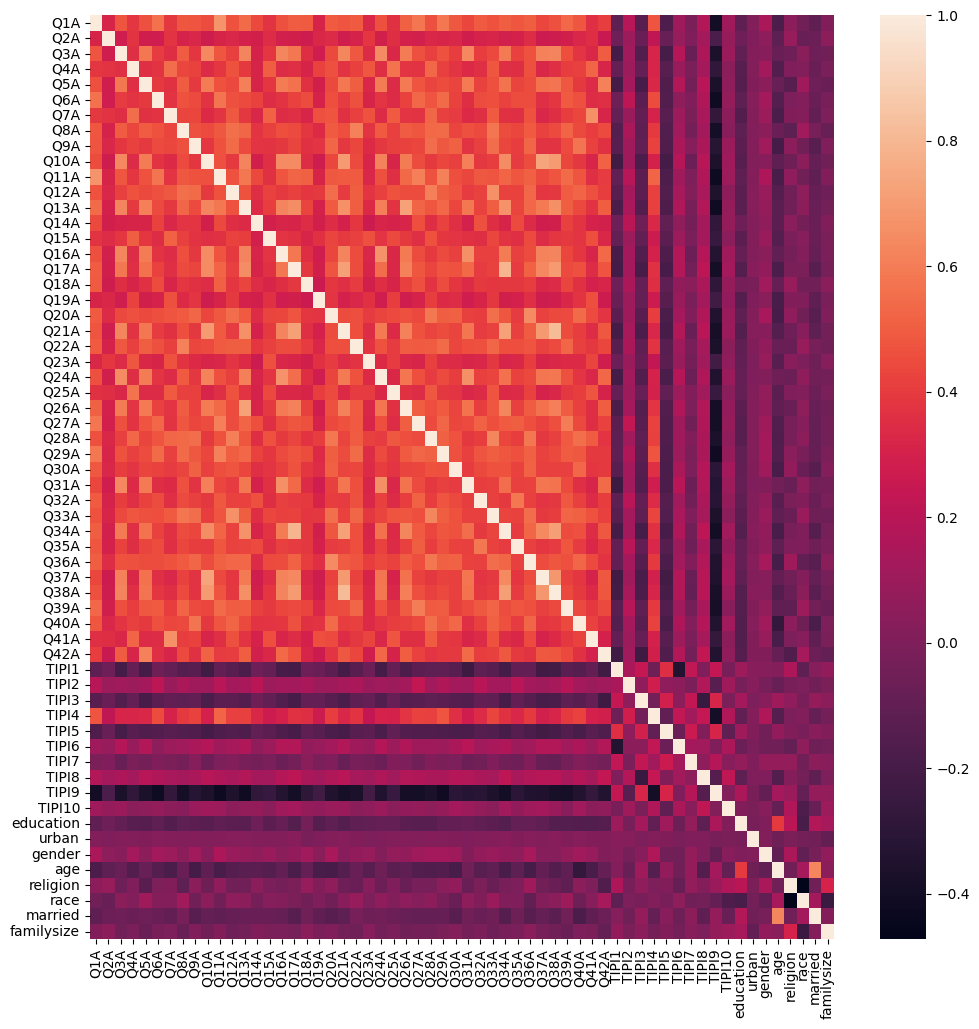

In [237]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns) #relationship between features

<Axes: >

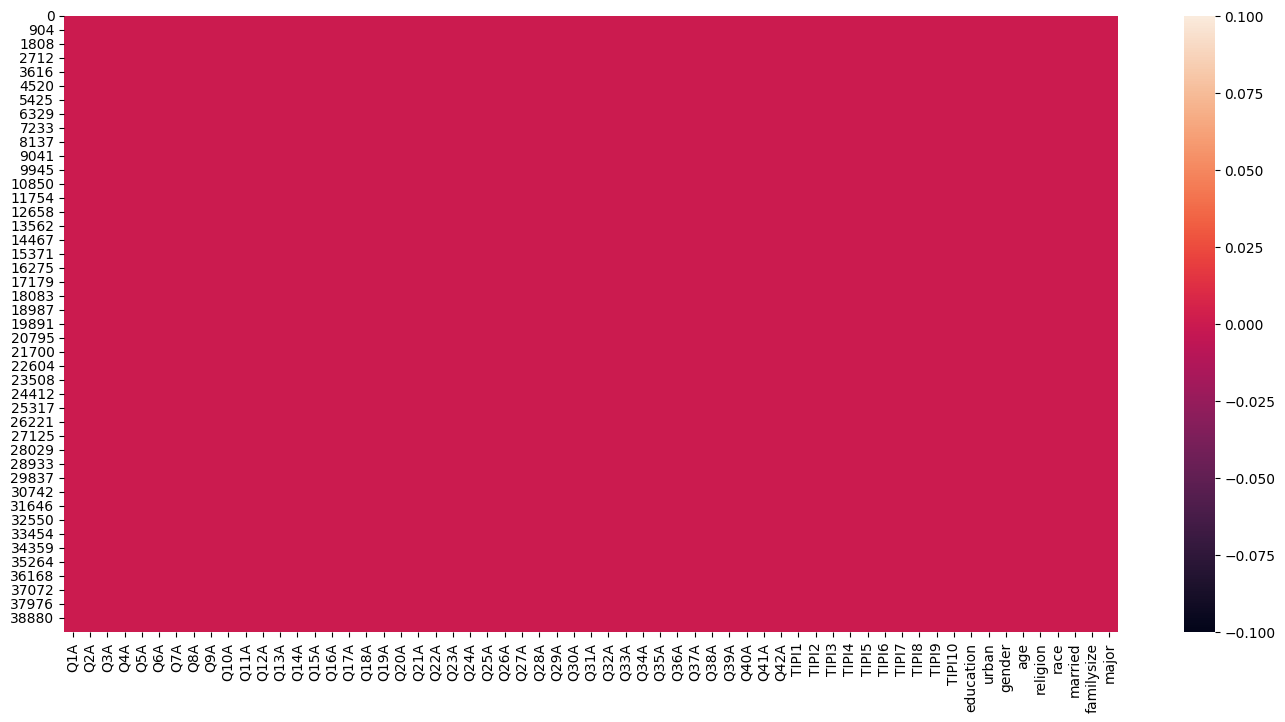

In [238]:
plt.figure(figsize=(17, 8))
sns.heatmap(df3.isnull())

In [239]:
df3.corr()

<ipython-input-239-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize
Q1A,1.000000,0.313961,0.471046,0.383055,0.463068,0.561160,0.384729,0.476582,0.472113,0.447890,0.675143,0.467632,0.544850,0.437899,0.370174,0.463787,0.494893,0.488665,0.315153,0.490246,0.473856,0.489304,0.330890,0.460946,0.362749,0.508437,0.577334,0.463164,0.581520,0.485805,0.434835,0.489305,0.470321,0.500941,0.482154,0.500113,0.432867,0.462479,0.530330,0.477255,0.357194,0.406933,-0.113123,0.190538,-0.129256,0.473376,-0.171094,0.109631,-0.011596,0.174637,-0.399194,0.105188,-0.105192,0.016150,0.144306,-0.176101,0.047566,-0.043987,-0.109710,0.007074
Q2A,0.313961,1.000000,0.280459,0.368345,0.283552,0.280540,0.372867,0.304295,0.325994,0.271485,0.312239,0.325302,0.302994,0.287115,0.346299,0.294812,0.292155,0.274841,0.332260,0.339813,0.286303,0.306814,0.381286,0.286984,0.355497,0.299145,0.298136,0.330762,0.316544,0.323536,0.282638,0.305071,0.319926,0.296356,0.303493,0.349732,0.264595,0.274924,0.292046,0.325078,0.354608,0.257881,-0.054257,0.099244,-0.074792,0.221140,-0.081337,0.080138,0.002778,0.129448,-0.179539,0.077790,-0.053878,0.004375,0.051871,-0.110526,0.081637,-0.076161,-0.069067,0.040052
Q3A,0.471046,0.280459,1.000000,0.360864,0.581712,0.397470,0.352675,0.494420,0.379671,0.634031,0.477500,0.417028,0.622748,0.304478,0.380633,0.627872,0.581692,0.352054,0.280834,0.440571,0.629838,0.483447,0.342126,0.645985,0.331063,0.595579,0.460745,0.417725,0.465998,0.401938,0.636955,0.406272,0.439760,0.591350,0.420947,0.465675,0.614556,0.623534,0.457646,0.377175,0.328902,0.497125,-0.204640,0.118051,-0.157128,0.316689,-0.198091,0.178215,-0.075889,0.159762,-0.366394,0.092530,-0.102189,0.017703,0.027902,-0.076168,-0.054805,0.038029,-0.057018,-0.042152
Q4A,0.383055,0.368345,0.360864,1.000000,0.358418,0.367310,0.547544,0.432734,0.424254,0.339065,0.380204,0.466617,0.391096,0.315254,0.501270,0.347121,0.359318,0.312189,0.420811,0.464762,0.368285,0.415543,0.478896,0.349974,0.564449,0.375095,0.371910,0.529085,0.414759,0.377110,0.338053,0.356690,0.479729,0.358379,0.354884,0.459550,0.327660,0.356153,0.402807,0.417525,0.517172,0.316743,-0.086696,0.099062,-0.091677,0.315552,-0.129134,0.090318,-0.008149,0.126301,-0.282245,0.037152,-0.127908,0.014108,0.121313,-0.153361,0.004703,0.010959,-0.073443,-0.013350
Q5A,0.463068,0.283552,0.581712,0.358418,1.000000,0.393786,0.363067,0.496615,0.395782,0.593097,0.467953,0.440149,0.604309,0.311792,0.382836,0.596363,0.560130,0.361757,0.289909,0.439616,0.582811,0.503929,0.327643,0.592000,0.339370,0.591428,0.471403,0.430364,0.450696,0.427467,0.588659,0.422370,0.463410,0.568554,0.425837,0.448543,0.558581,0.570374,0.484779,0.392968,0.340749,0.609500,-0.204375,0.119933,-0.196521,0.328750,-0.167242,0.177242,-0.036820,0.198651,-0.366036,0.054490,-0.139964,0.006328,0.039982,-0.080165,-0.128620,0.112065,-0.056781,-0.073135
Q6A,0.561160,0.280540,0.397470,0.367310,0.393786,1.000000,0.370464,0.466995,0.446701,0.367596,0.571975,0.463337,0.445197,0.420211,0.344560,0.369825,0.421635,0.448016,0.308574,0.455030,0.397725,0.461250,0.311677,0.376571,0.343401,0.422887,0.533767,0.475247,0.545534,0.422196,0.351210,0.450930,0.458774,0.423354,0.448941,0.452456,0.356736,0.381536,0.492783,0.463156,0.347232,0.357042,-0.062944,0.217222,-0.121689,0.449322,-0.150754,0.054871,0.000836,0.166239,-0.415293,0.072130,-0.107965,0.024284,0.120300,-0.145210,-0.001004,0.016964,-0.074616,-0.022727
Q7A,0.384729,0.372867,0.352675,0.547544,0.363067,0.370464,1.000000,0.429707,0.431782,0.337184,0.376607,0.482907,0.388568,0.325162,0.515257,0.346491,0.360715,0.315583,0.460147,0.470819,0.363331,0.410294,0.465499,0.343773,0.492979,0.375277,0.371175,0.526132,0.413771,0.400379,0.337062,0.360283,0.488375,0.365368,0.358800,0.467314,0.326855,0.351370,0.406561,0.4

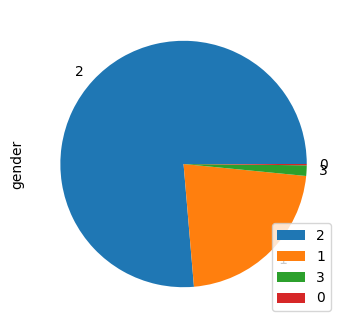

In [240]:
plt.figure(figsize=(4,4))
df3.gender.value_counts(normalize=True)
df3.gender.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

2 is female, 1 is male, 0 and 3 are classified as others.

In [241]:
df3.gender.unique()

array([2, 1, 3, 0])

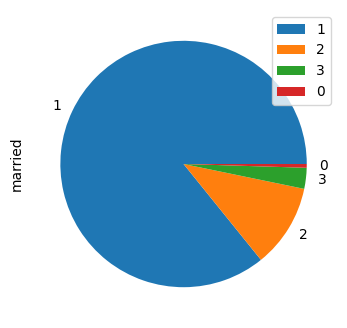

In [242]:
plt.figure(figsize=(4,4))
df3.married.value_counts(normalize=True)
df3.married.value_counts(normalize=True).plot.pie()
plt.legend()
plt.show()

1 are participants that have never been married, 2 is for participants who have been married.

In [243]:
df3.married.unique()

array([1, 3, 2, 0])

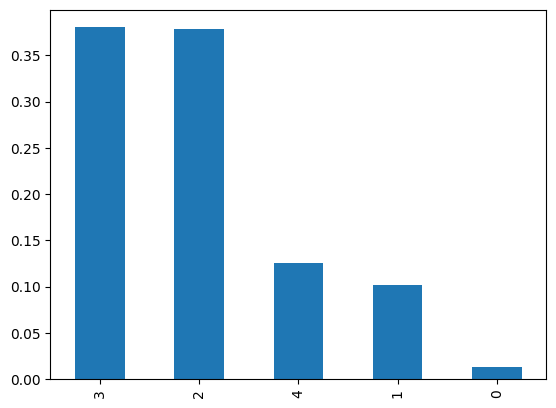

In [244]:
df3.education.value_counts(normalize=True)
df3.education.value_counts(normalize=True)[:20].plot.bar()
plt.show()
#measured as a percentage

0 and 1 less than high school, 2 high school completed, 3 university degree, 4 post grad degree

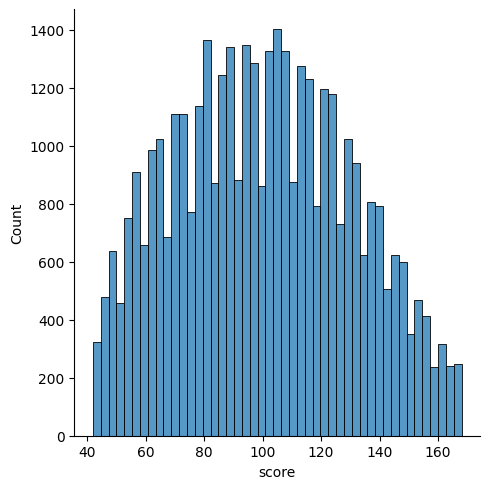

In [245]:
sumofQ = [f'Q{i}A' for i in range(1, 43)]
df3['score']=0
for i in range(0,42):                        #Total score of all 42 questions
  df3['score']=df3['score']+df3[sumofQ[i]]
sns.displot(x=df3['score'])

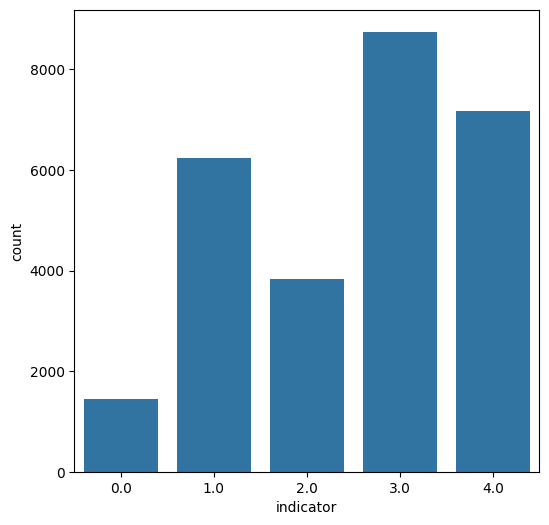

In [246]:
def depressionindicators(value):      #function to create indicator target
    if value <= 50:
        return 0
    if 51 <= value <= 70:
        return 1
    if 51 <= value <= 80:
        return 2
    if 81 <= value <= 100:
        return 3
    if value > 130:
        return 4
plt.figure(figsize=(6,6))
df3['indicator'] = df3['score'].apply(depressionindicators)
sns.countplot(x=df3['indicator']);

In [247]:
#object values in df3
df3_cat=df2.select_dtypes(object)
df3_cat

,country,major
0,IN,No degree
1,US,No degree
2,PL,No degree
3,US,biology
4,MY,Psychology
...,...,...
39770,GB,No degree
39771,MY,Mathematic
39772,US,Computer Science
39773,US,History


In [248]:
encodedoutput_Y= LabelEncoder()
df3['major'] = encodedoutput_Y.fit_transform(df.iloc[:,1].values) #changing major to values
df3

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize,major,score,indicator
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,1,2,27,143,4.0
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,1,4,1,110,NaN
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,3,6,110,NaN
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,1,5,22,91,3.0
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,1,4,35,143,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,2,2,4,2,1,3,4,2,4,3,4,3,1,3,2,3,2,2,3,2,4,1,2,4,1,2,4,4,2,3,1,3,2,2,3,5,6,5,5,3,3,6,2,2,1,16,2,60,1,2,30,105,NaN
39771,3,4,3,4,3,4,4,4,3,4,4,4,4,4,4,4,3,3,4,4,4,4,3,4,3,4,3,3,3,3,4,3,3,4,3,3,3,4,3,3,3,4,4,5,5,7,4,6,4,7,4,4,3,2,1,21,10,10,1,4,13,148,4.0
39772,2,1,2,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,2,1,2,1,1,1,1,1,2,1,1,1,6,6,7,5,6,3,6,1,5,4,3,2,2,48,7,30,2,3,0,52,1.0
39773,3,1,2,2,3,3,3,4,3,1,3,3,4,4,1,1,2,3,1,2,2,4,1,2,1,3,4,3,3,1,2,3,4,2,3,2,1,2,3,2,4,3,1,6,5,7,3,5,3,5,3,4,3,2,2,20,6,60,1,2,35,104,NaN


In [249]:
#12355 nulls values in the indicator column initially
nan_count = df3.isna().sum()
print(nan_count )

Q1A               0
Q2A               0
Q3A               0
Q4A               0
Q5A               0
              ...  
married           0
familysize        0
major             0
score             0
indicator     12355
Length: 63, dtype: int64


In [250]:
df3=df3.fillna(df3.mean())
df3

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,Q11A,Q12A,Q13A,Q14A,Q15A,Q16A,Q17A,Q18A,Q19A,Q20A,Q21A,Q22A,Q23A,Q24A,Q25A,Q26A,Q27A,Q28A,Q29A,Q30A,Q31A,Q32A,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,urban,gender,age,religion,race,married,familysize,major,score,indicator
0,4,4,2,4,4,4,4,4,2,1,4,4,4,4,4,4,3,4,3,3,1,4,4,4,4,4,4,3,4,2,4,4,2,3,4,4,1,2,4,3,4,4,1,5,7,7,7,7,7,5,1,1,2,3,2,16,12,10,1,2,27,143,4.00000
1,4,1,2,3,4,4,3,4,3,2,2,2,4,4,3,3,4,2,1,1,2,3,1,2,2,3,3,4,3,3,2,3,3,2,2,3,4,2,2,1,2,2,6,5,4,7,5,4,7,7,1,5,2,3,2,16,7,70,1,4,1,110,2.50974
2,3,1,4,1,4,3,1,3,2,4,2,1,4,1,4,4,4,2,2,1,4,3,2,4,2,1,2,1,2,2,4,3,1,4,3,4,4,4,2,2,1,4,2,5,2,2,5,6,5,5,3,2,2,3,2,17,4,60,1,3,6,110,2.50974
3,2,3,2,1,3,3,4,2,3,3,2,1,1,4,2,2,3,1,1,2,1,1,1,1,1,2,4,1,3,3,3,1,2,4,1,1,2,1,3,4,4,2,1,1,7,4,6,4,6,1,6,1,1,3,2,13,4,70,1,5,22,91,3.00000
4,2,2,3,4,4,2,4,4,4,3,2,4,4,4,4,3,4,4,4,4,3,3,4,2,4,4,2,4,2,4,3,4,4,4,3,4,3,3,3,4,4,3,2,5,3,6,5,5,5,6,3,3,3,2,2,19,10,10,1,4,35,143,4.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,2,2,4,2,1,3,4,2,4,3,4,3,1,3,2,3,2,2,3,2,4,1,2,4,1,2,4,4,2,3,1,3,2,2,3,5,6,5,5,3,3,6,2,2,1,16,2,60,1,2,30,105,2.50974
39771,3,4,3,4,3,4,4,4,3,4,4,4,4,4,4,4,3,3,4,4,4,4,3,4,3,4,3,3,3,3,4,3,3,4,3,3,3,4,3,3,3,4,4,5,5,7,4,6,4,7,4,4,3,2,1,21,10,10,1,4,13,148,4.00000
39772,2,1,2,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,2,1,2,1,1,1,1,1,2,1,1,1,6,6,7,5,6,3,6,1,5,4,3,2,2,48,7,30,2,3,0,52,1.00000
39773,3,1,2,2,3,3,3,4,3,1,3,3,4,4,1,1,2,3,1,2,2,4,1,2,1,3,4,3,3,1,2,3,4,2,3,2,1,2,3,2,4,3,1,6,5,7,3,5,3,5,3,4,3,2,2,20,6,60,1,2,35,104,2.50974


##Splitting dataset

In [251]:
y = df3['indicator']                         #target feature
y=y.astype('int')                            #change indicator to int datatype
x= df3.drop(['score', 'indicator'], axis=1)  #drop indicator and score features

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42) #80 to 20%
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (31813, 61), y_train: (31813,)
x_test: (7954, 61), y_test: (7954,)


In [253]:
#normalization
scale = StandardScaler()
x_train_scaled = scale.fit_transform(x_train)
x_test_scaled = scale.transform(x_test)

## Naive bayes classifier

In [254]:
nb_classifier = MultinomialNB()

In [255]:
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [256]:
y_pred = nb_classifier.predict(x_test)

In [257]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.5636157907970832


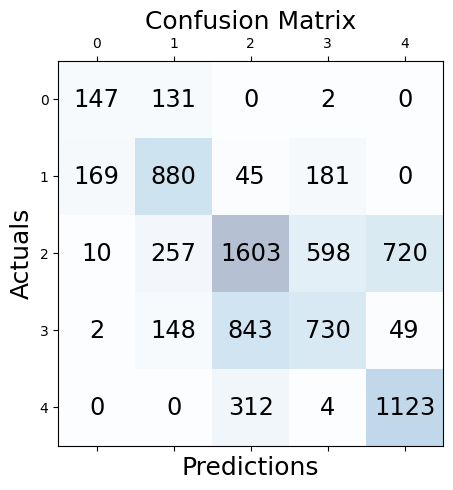

              precision    recall  f1-score   support

           0       0.45      0.53      0.48       280
           1       0.62      0.69      0.65      1275
           2       0.57      0.50      0.54      3188
           3       0.48      0.41      0.44      1772
           4       0.59      0.78      0.67      1439

    accuracy                           0.56      7954
   macro avg       0.54      0.58      0.56      7954
weighted avg       0.56      0.56      0.56      7954



In [258]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [259]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [260]:
y_pred = gnb.predict(x_test)

In [261]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8154387729444305


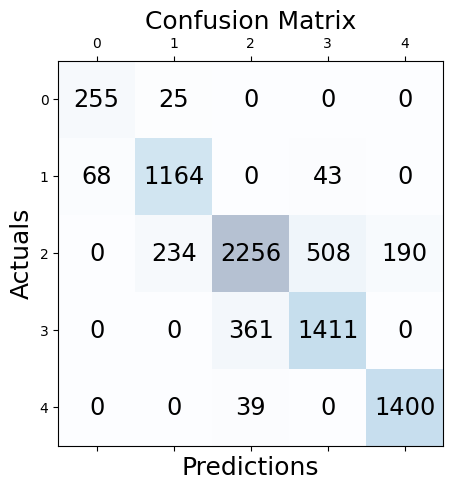

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       280
           1       0.82      0.91      0.86      1275
           2       0.85      0.71      0.77      3188
           3       0.72      0.80      0.76      1772
           4       0.88      0.97      0.92      1439

    accuracy                           0.82      7954
   macro avg       0.81      0.86      0.83      7954
weighted avg       0.82      0.82      0.81      7954



In [262]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [263]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [264]:
y_pred = bnb.predict(x_test)

In [265]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3984158913754086


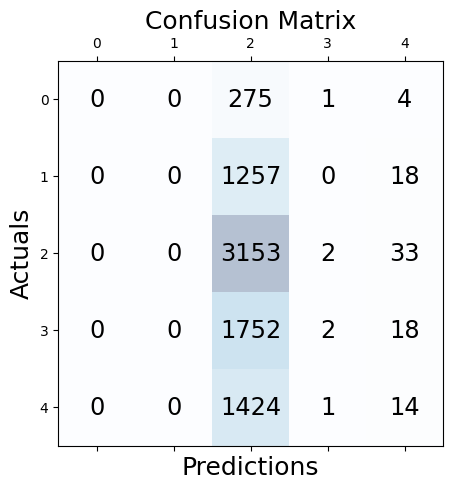

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       280
           1       0.00      0.00      0.00      1275
           2       0.40      0.99      0.57      3188
           3       0.33      0.00      0.00      1772
           4       0.16      0.01      0.02      1439

    accuracy                           0.40      7954
   macro avg       0.18      0.20      0.12      7954
weighted avg       0.26      0.40      0.23      7954



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [266]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

## Random forest classifier

In [267]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #100 trees

In [268]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [269]:
y_pred = rf_classifier.predict(x_test)

In [270]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8645964294694494


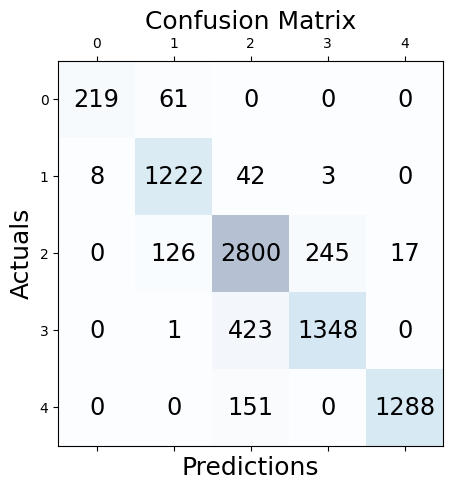

              precision    recall  f1-score   support

           0       0.96      0.78      0.86       280
           1       0.87      0.96      0.91      1275
           2       0.82      0.88      0.85      3188
           3       0.84      0.76      0.80      1772
           4       0.99      0.90      0.94      1439

    accuracy                           0.86      7954
   macro avg       0.90      0.85      0.87      7954
weighted avg       0.87      0.86      0.86      7954



In [271]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

## Decision tree classifier

In [272]:
rdt_classifier = DecisionTreeClassifier(random_state=42)

In [273]:
rdt_classifier.fit(x_train, y_train)
y_pred = rdt_classifier.predict(x_test)

In [274]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.6756349006789037


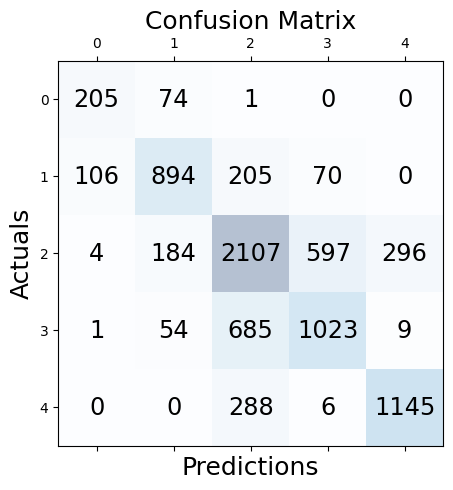

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       280
           1       0.74      0.70      0.72      1275
           2       0.64      0.66      0.65      3188
           3       0.60      0.58      0.59      1772
           4       0.79      0.80      0.79      1439

    accuracy                           0.68      7954
   macro avg       0.68      0.69      0.69      7954
weighted avg       0.68      0.68      0.68      7954



In [275]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

##SVM

In [276]:
svm_classifier = SVC(kernel='linear')

In [277]:
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)


In [278]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.8588131757606235


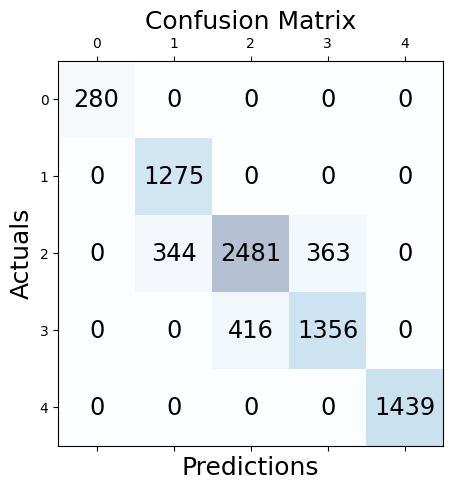

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       280
           1       0.79      1.00      0.88      1275
           2       0.86      0.78      0.82      3188
           3       0.79      0.77      0.78      1772
           4       1.00      1.00      1.00      1439

    accuracy                           0.86      7954
   macro avg       0.89      0.91      0.89      7954
weighted avg       0.86      0.86      0.86      7954



In [279]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [280]:
poly_svm = svm.SVC(kernel='poly', degree=3)

In [281]:
poly_svm.fit(x_train, y_train)
y_pred = poly_svm.predict(x_test)

In [282]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8292682926829268


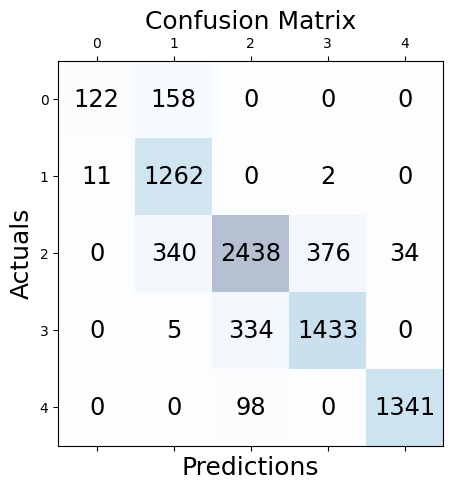

              precision    recall  f1-score   support

           0       0.92      0.44      0.59       280
           1       0.72      0.99      0.83      1275
           2       0.85      0.76      0.80      3188
           3       0.79      0.81      0.80      1772
           4       0.98      0.93      0.95      1439

    accuracy                           0.83      7954
   macro avg       0.85      0.79      0.80      7954
weighted avg       0.84      0.83      0.83      7954



In [283]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [284]:
rbf_svm = svm.SVC(kernel='rbf', gamma='scale')

In [285]:
rbf_svm.fit(x_train, y_train)
y_pred = rbf_svm.predict(x_test)

In [286]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.832034196630626


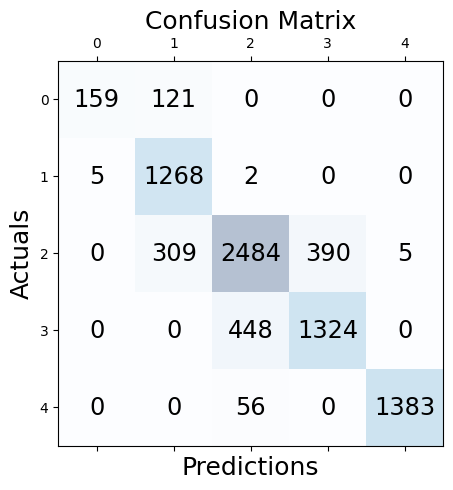

              precision    recall  f1-score   support

           0       0.97      0.57      0.72       280
           1       0.75      0.99      0.85      1275
           2       0.83      0.78      0.80      3188
           3       0.77      0.75      0.76      1772
           4       1.00      0.96      0.98      1439

    accuracy                           0.83      7954
   macro avg       0.86      0.81      0.82      7954
weighted avg       0.84      0.83      0.83      7954



In [287]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [288]:
sig_svm = svm.SVC(kernel='sigmoid')

In [289]:
sig_svm.fit(x_train, y_train)
y_pred = sig_svm.predict(x_test)

In [290]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.36849383957757104


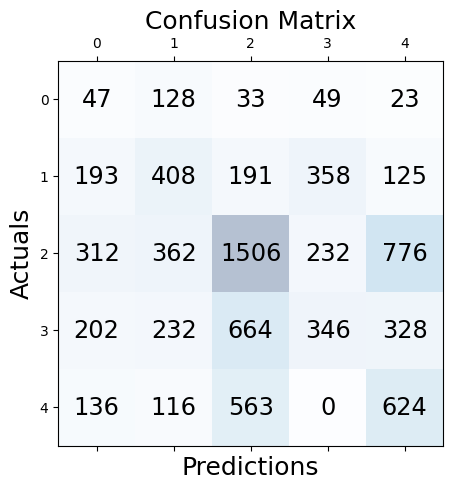

              precision    recall  f1-score   support

           0       0.05      0.17      0.08       280
           1       0.33      0.32      0.32      1275
           2       0.51      0.47      0.49      3188
           3       0.35      0.20      0.25      1772
           4       0.33      0.43      0.38      1439

    accuracy                           0.37      7954
   macro avg       0.31      0.32      0.30      7954
weighted avg       0.40      0.37      0.38      7954



In [291]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

## Refining models

In [292]:
bnb2 = BernoulliNB(binarize = True)
bnb2.fit(x_train, y_train)

BernoulliNB(binarize=True)

In [293]:
y_pred = bnb2.predict(x_test)

In [294]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.625471460900176


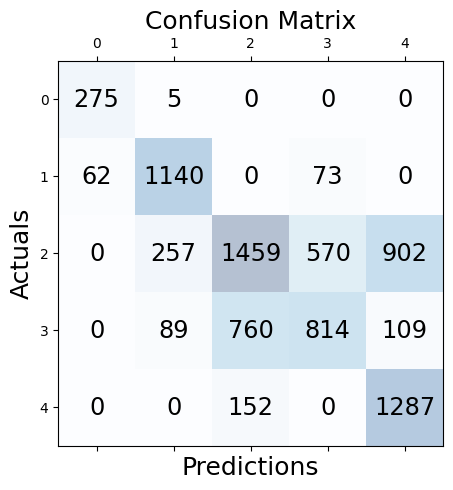

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       280
           1       0.76      0.89      0.82      1275
           2       0.62      0.46      0.52      3188
           3       0.56      0.46      0.50      1772
           4       0.56      0.89      0.69      1439

    accuracy                           0.63      7954
   macro avg       0.66      0.74      0.69      7954
weighted avg       0.62      0.63      0.61      7954



In [295]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [296]:
rdt_classifier2 = DecisionTreeClassifier(random_state=42,criterion = 'entropy', max_depth = 16)

In [297]:
rdt_classifier2.fit(x_train, y_train)
y_pred = rdt_classifier2.predict(x_test)

In [298]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.6893386975106864


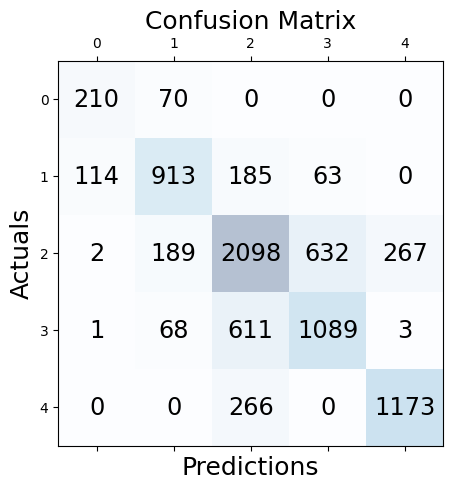

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       280
           1       0.74      0.72      0.73      1275
           2       0.66      0.66      0.66      3188
           3       0.61      0.61      0.61      1772
           4       0.81      0.82      0.81      1439

    accuracy                           0.69      7954
   macro avg       0.69      0.71      0.70      7954
weighted avg       0.69      0.69      0.69      7954



In [299]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [300]:
rdt_classifier3 = DecisionTreeClassifier(random_state=42,criterion = 'gini', max_depth = 16)

In [301]:
rdt_classifier3.fit(x_train, y_train)
y_pred = rdt_classifier3.predict(x_test)

In [302]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.6820467689212975


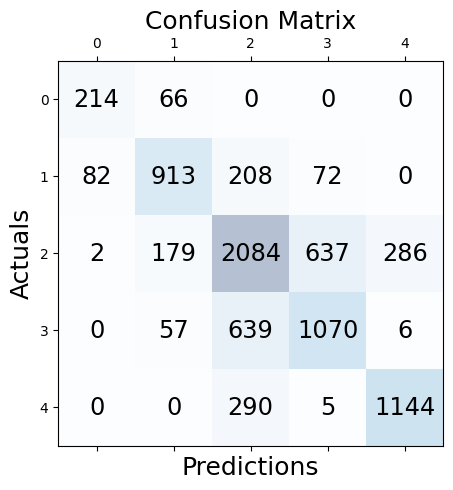

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       280
           1       0.75      0.72      0.73      1275
           2       0.65      0.65      0.65      3188
           3       0.60      0.60      0.60      1772
           4       0.80      0.79      0.80      1439

    accuracy                           0.68      7954
   macro avg       0.70      0.71      0.70      7954
weighted avg       0.68      0.68      0.68      7954



In [303]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))

In [304]:
rdt_classifier4 = DecisionTreeClassifier(random_state=42,criterion = 'log_loss', max_depth = 16)

In [305]:
rdt_classifier4.fit(x_train, y_train)
y_pred = rdt_classifier4.predict(x_test)

In [306]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Accuracy Score: 0.6893386975106864


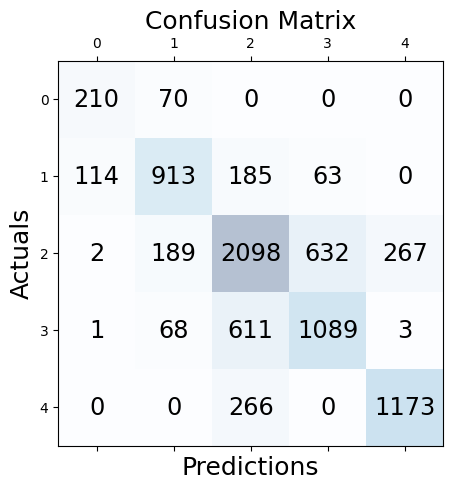

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       280
           1       0.74      0.72      0.73      1275
           2       0.66      0.66      0.66      3188
           3       0.61      0.61      0.61      1772
           4       0.81      0.82      0.81      1439

    accuracy                           0.69      7954
   macro avg       0.69      0.71      0.70      7954
weighted avg       0.69      0.69      0.69      7954



In [307]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test, y_pred))